### **Impact of Seasonal Changes on Gym Usage** ###


#### **STEP 1:EXPLORING THE DATASET AND ITS FEATURES** ####

In [1]:
import pandas as pd

# Load datasets
gym_data = pd.read_csv("gym_membership.csv")
crowd_data = pd.read_csv("data.csv")

# Display basic information
print(gym_data.info())
print(crowd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   gender                 1000 non-null   object
 2   birthday               1000 non-null   object
 3   Age                    1000 non-null   int64 
 4   abonoment_type         1000 non-null   object
 5   visit_per_week         1000 non-null   int64 
 6   days_per_week          1000 non-null   object
 7   attend_group_lesson    1000 non-null   bool  
 8   fav_group_lesson       503 non-null    object
 9   avg_time_check_in      1000 non-null   object
 10  avg_time_check_out     1000 non-null   object
 11  avg_time_in_gym        1000 non-null   int64 
 12  drink_abo              1000 non-null   bool  
 13  fav_drink              496 non-null    object
 14  personal_training      1000 non-null   bool  
 15  name_personal_trainer 

In [2]:
print(" GYM DATASET\n",gym_data.head())
print("CROWD DATASET\n",crowd_data.head())

 GYM DATASET
    id  gender    birthday  Age abonoment_type  visit_per_week  \
0   1  Female  1997-04-18   27        Premium               4   
1   2  Female  1977-09-18   47       Standard               3   
2   3    Male  1983-03-30   41        Premium               1   
3   4    Male  1980-04-12   44        Premium               3   
4   5    Male  1980-09-10   44       Standard               2   

        days_per_week  attend_group_lesson            fav_group_lesson  \
0  Mon, Sat, Tue, Wed                 True  Kickboxen, BodyPump, Zumba   
1       Mon, Sat, Wed                False                         NaN   
2                 Sat                 True                       XCore   
3       Sat, Tue, Wed                False                         NaN   
4            Thu, Wed                 True        Running, Yoga, Zumba   

  avg_time_check_in avg_time_check_out  avg_time_in_gym  drink_abo  \
0          19:31:00           21:27:00              116      False   
1         

#### Clean gym_membership dataset ####


In [3]:
gym_data.rename(columns={ 'Age': 'age'}, inplace=True)


#### Clean crowd_data ####


In [4]:
#adding 'id' column for merging
crowd_data['id'] = crowd_data.index + 1 
crowd_data.rename(columns={'id': 'id'}, inplace=True)  

crowd_data['date'] = pd.to_datetime(crowd_data['date'])
crowd_data['temperature'] = crowd_data['temperature'].clip(lower=60, upper=70)
crowd_data = crowd_data[crowd_data['number_people'] <=50] #just sorted as this gym accomodate 40
print("crowd data after filtering and transformations:\n", crowd_data[['id','date', 'number_people', 'temperature', 'month']])

print("crowd data\n",crowd_data['number_people'] )

crowd data after filtering and transformations:
           id                       date  number_people  temperature  month
0          1  2015-08-14 17:00:11-07:00             37        70.00      8
1          2  2015-08-14 17:20:14-07:00             45        70.00      8
2          3  2015-08-14 17:30:15-07:00             40        70.00      8
3          4  2015-08-14 17:40:16-07:00             44        70.00      8
4          5  2015-08-14 17:50:17-07:00             45        70.00      8
...      ...                        ...            ...          ...    ...
62179  62180  2017-03-18 18:42:28-07:00             23        61.07      3
62180  62181  2017-03-18 18:52:35-07:00             21        61.07      3
62181  62182  2017-03-18 19:02:40-07:00             25        60.00      3
62182  62183  2017-03-18 19:12:47-07:00             18        60.00      3
62183  62184  2017-03-18 19:22:51-07:00             23        60.00      3

[51581 rows x 5 columns]
crowd data
 0        37
1

#### Merge datasets


In [5]:
combined_data = pd.merge(
    gym_data[['id', 'age', 'gender', 'visit_per_week']], 
    crowd_data[['id', 'date', 'number_people', 'temperature', 'is_weekend', 'is_holiday', 'day_of_week', 'month']],
    how='right', 
    on='id'  
)

# Preview the combined dataset
print(combined_data.head())


   id   age  gender  visit_per_week                       date  number_people  \
0   1  27.0  Female             4.0  2015-08-14 17:00:11-07:00             37   
1   2  47.0  Female             3.0  2015-08-14 17:20:14-07:00             45   
2   3  41.0    Male             1.0  2015-08-14 17:30:15-07:00             40   
3   4  44.0    Male             3.0  2015-08-14 17:40:16-07:00             44   
4   5  44.0    Male             2.0  2015-08-14 17:50:17-07:00             45   

   temperature  is_weekend  is_holiday  day_of_week  month  
0         70.0           0           0            4      8  
1         70.0           0           0            4      8  
2         70.0           0           0            4      8  
3         70.0           0           0            4      8  
4         70.0           0           0            4      8  


In [6]:
print(combined_data.head())
print(combined_data.info())
print("saved")

   id   age  gender  visit_per_week                       date  number_people  \
0   1  27.0  Female             4.0  2015-08-14 17:00:11-07:00             37   
1   2  47.0  Female             3.0  2015-08-14 17:20:14-07:00             45   
2   3  41.0    Male             1.0  2015-08-14 17:30:15-07:00             40   
3   4  44.0    Male             3.0  2015-08-14 17:40:16-07:00             44   
4   5  44.0    Male             2.0  2015-08-14 17:50:17-07:00             45   

   temperature  is_weekend  is_holiday  day_of_week  month  
0         70.0           0           0            4      8  
1         70.0           0           0            4      8  
2         70.0           0           0            4      8  
3         70.0           0           0            4      8  
4         70.0           0           0            4      8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51581 entries, 0 to 51580
Data columns (total 11 columns):
 #   Column          Non-Null Count  D

#### **STEP 2: DATA CLEANING** ####


In [7]:
print(combined_data.isnull().sum())


id                    0
age               50717
gender            50717
visit_per_week    50717
date                  0
number_people         0
temperature           0
is_weekend            0
is_holiday            0
day_of_week           0
month                 0
dtype: int64


In [8]:
#  Fill missing 'gender' with 'Unknown'
combined_data['gender'].fillna('Unknown', inplace=True)
print(combined_data['gender'])

0         Female
1         Female
2           Male
3           Male
4           Male
          ...   
51576    Unknown
51577    Unknown
51578    Unknown
51579    Unknown
51580    Unknown
Name: gender, Length: 51581, dtype: object


In [9]:
mean_age = combined_data['age'].mean()  # Calculate mean age
combined_data['age'].fillna(mean_age, inplace=True)
print(combined_data['age'])

0        27.000000
1        47.000000
2        41.000000
3        44.000000
4        44.000000
           ...    
51576    30.564815
51577    30.564815
51578    30.564815
51579    30.564815
51580    30.564815
Name: age, Length: 51581, dtype: float64


In [10]:
mean_visit = combined_data['visit_per_week'].mean()

# Apply the calculation for 'visit_per_week' from 'days_per_week'
combined_data['visit_per_week'] = gym_data['days_per_week'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Fill missing values in 'visit_per_week' with the mean value
combined_data['visit_per_week'] = combined_data['visit_per_week'].fillna(mean_visit)
combined_data['visit_per_week'] = combined_data['visit_per_week'].round().astype(int)

# Print the updated 'visit_per_week' column
print(combined_data['visit_per_week'])


0        4
1        3
2        1
3        3
4        2
        ..
51576    3
51577    3
51578    3
51579    3
51580    3
Name: visit_per_week, Length: 51581, dtype: int64


In [11]:
# Validate ranges  ('visit_per_week')
if combined_data["visit_per_week"].max() > 7 or combined_data["visit_per_week"].min() < 0:
    raise ValueError("Invalid values in 'visit_per_week'")

In [12]:
months_in_combined = combined_data['month'].unique()
print(f"Months present in the combined dataset: {sorted(months_in_combined)}")

Months present in the combined dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


#### **CLEANED DATASET ARE SAVED HERE** ####

In [13]:
combined_data.to_csv("cleaned_combined_gymdata.csv", index=False)
print(combined_data.info())
print(combined_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51581 entries, 0 to 51580
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              51581 non-null  int64  
 1   age             51581 non-null  float64
 2   gender          51581 non-null  object 
 3   visit_per_week  51581 non-null  int64  
 4   date            51581 non-null  object 
 5   number_people   51581 non-null  int64  
 6   temperature     51581 non-null  float64
 7   is_weekend      51581 non-null  int64  
 8   is_holiday      51581 non-null  int64  
 9   day_of_week     51581 non-null  int64  
 10  month           51581 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 4.3+ MB
None
   id   age  gender  visit_per_week                       date  number_people  \
0   1  27.0  Female               4  2015-08-14 17:00:11-07:00             37   
1   2  47.0  Female               3  2015-08-14 17:20:14-07:00             45

#### Data Wrangling: Merging datasets, creating new columns (extracting season from month), and reshaping the data for analysis.####

In [14]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_data['season'] = combined_data['month'].apply(get_season)
print("Season trends\n",combined_data['season'])


Season trends
 0        Summer
1        Summer
2        Summer
3        Summer
4        Summer
          ...  
51576    Spring
51577    Spring
51578    Spring
51579    Spring
51580    Spring
Name: season, Length: 51581, dtype: object


In [15]:
# Define weekend_visits: attendance during weekends
combined_data['weekend_visits'] = combined_data['is_weekend'] * combined_data['number_people']
print("Weekend_visits\n",combined_data['weekend_visits'])


Weekend_visits
 0         0
1         0
2         0
3         0
4         0
         ..
51576    23
51577    21
51578    25
51579    18
51580    23
Name: weekend_visits, Length: 51581, dtype: int64


#### **STEP 3:  Gym Attendance Trends** ####

In [16]:
# Analyze key statistics
print("Summary of Gym Attendance Trends:")
print("=================================")
# Average attendance per season
attendance_by_season = combined_data.groupby('season')['number_people'].mean()
print("Average attendance per season:")
print(attendance_by_season)

# Weekend vs. Weekday attendance
weekend_attendance = combined_data[combined_data['is_weekend'] == 1]['number_people'].sum()
weekday_attendance = combined_data[combined_data['is_weekend'] == 0]['number_people'].sum()
print(f"\nTotal weekend attendance: {weekend_attendance}")
print(f"Total weekday attendance: {weekday_attendance}")

# Attendance during holidays
holiday_attendance = combined_data[combined_data['is_holiday'] == 0]['number_people'].sum()
print(f"\nTotal holiday attendance: {holiday_attendance}")

# Save the processed dataset for Power BI visualization
combined_data.to_csv("processed_gym_attendance.csv", index=False)
print("\nProcessed dataset saved as 'processed_gym_attendance.csv' for further analysis in Power BI.")

Summary of Gym Attendance Trends:
Average attendance per season:
season
Fall      23.441115
Spring    24.073990
Summer    20.113276
Winter    18.606115
Name: number_people, dtype: float64

Total weekend attendance: 284445
Total weekday attendance: 827213

Total holiday attendance: 1110455

Processed dataset saved as 'processed_gym_attendance.csv' for further analysis in Power BI.


#### Pivot table- Attendance based on season and day type 

In [17]:
pivot_attendance = combined_data.pivot_table(
    index='season', 
    columns='is_weekend', 
    values='number_people', 
    aggfunc='mean'
)
pivot_attendance.rename(columns={0: 'Weekday', 1: 'Weekend'}, inplace=True)
print("Pivot Table - Average Attendance by Season and Weekend:")
print(pivot_attendance)

# Save the pivot table for Power BI
pivot_attendance.to_csv("pivot_attendance_season_weekend.csv", index=True)
print("\nPivot table saved as 'pivot_attendance_season_weekend.csv'.")


Pivot Table - Average Attendance by Season and Weekend:
is_weekend    Weekday    Weekend
season                          
Fall        25.174345  19.578635
Spring      25.796529  19.847173
Summer      21.602272  16.733706
Winter      19.595278  16.375869

Pivot table saved as 'pivot_attendance_season_weekend.csv'.


#### **STEP4: VISUALIZATION** ####

#### Average Gym Attendance by Season - Line Chart

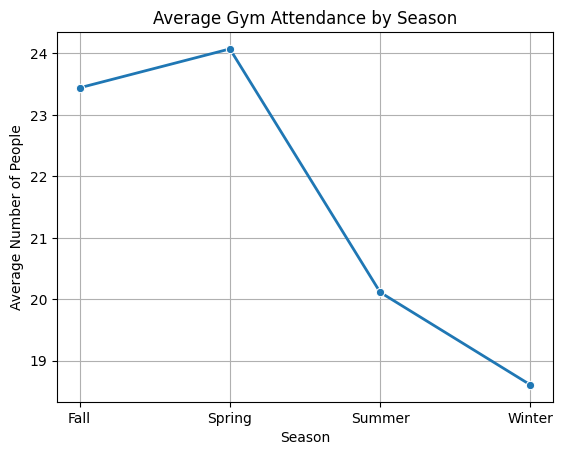

In [ ]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Average attendance by season
attendance_by_season = combined_data.groupby('season')['number_people'].mean().reset_index()

# Plot
sns.lineplot(data=attendance_by_season, x='season', y='number_people', marker='o', linewidth=2)
plt.title('Average Gym Attendance by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of People')
plt.grid(True)
plt.show()


#### Total Attendance: Weekdays vs. Weekends - Bar Chart

/var/folders/tw/p4qhn1d10xjb24gqdxxwlpbm0000gn/T/ipykernel_78446/2094857683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Attendance', data=pd.DataFrame(weekend_data), palette='viridis')


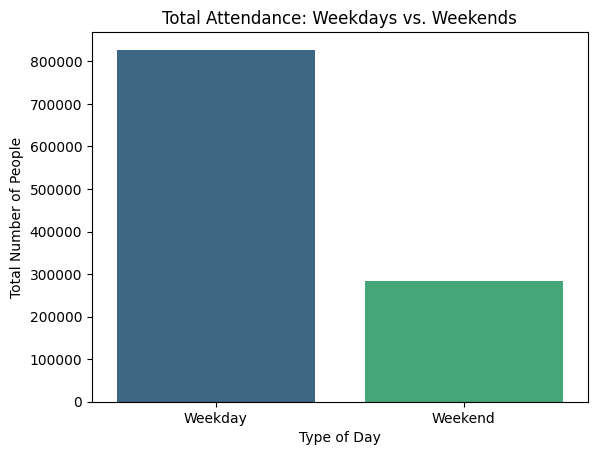

In [ ]:
#Week day type plots
weekend_data = {'Type': ['Weekday', 'Weekend'],
                'Attendance': [weekday_attendance, weekend_attendance]}

# Create a bar plot
sns.barplot(x='Type', y='Attendance', data=pd.DataFrame(weekend_data), palette='viridis')
plt.title('Total Attendance: Weekdays vs. Weekends')
plt.ylabel('Total Number of People')
plt.xlabel('Type of Day')
plt.show()


####  Attendance: Holidays vs. Non-Holidays- Pie Chart

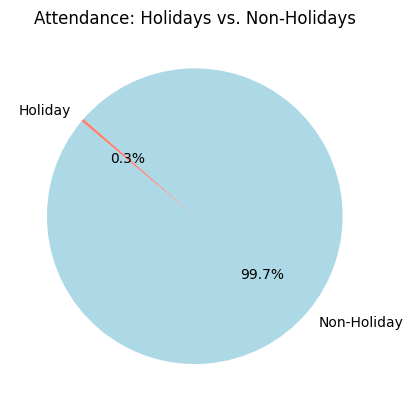

In [ ]:
# Prepare data
holiday_counts = combined_data['is_holiday'].value_counts()
labels = ['Non-Holiday', 'Holiday']

# Plot
plt.pie(holiday_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Attendance: Holidays vs. Non-Holidays')
plt.show()
# Result shows during holiday only few people attend gym 

#### Tried Facet grid for different season based on week day type and number of people

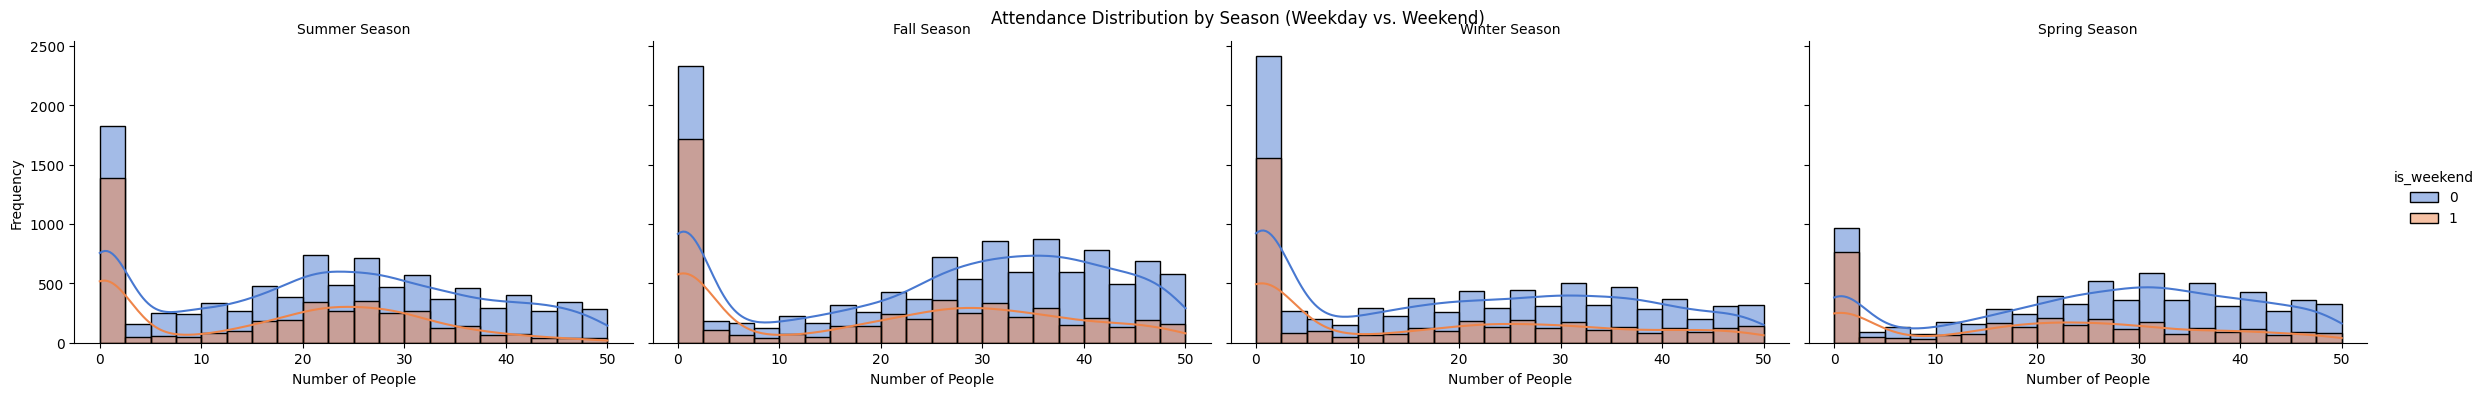

In [20]:
# Facet grid
g = sns.FacetGrid(combined_data, col="season", hue="is_weekend", height=4, aspect=1.5, palette='muted')
g.map(sns.histplot, "number_people", kde=True, bins=20)
g.add_legend()
g.set_titles("{col_name} Season")
g.set_axis_labels("Number of People", "Frequency")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Attendance Distribution by Season (Weekday vs. Weekend)')
plt.show()


#### Pivot Table - Visualization -Average Gym Attendance by Season and week day type

<Figure size 1000x600 with 0 Axes>

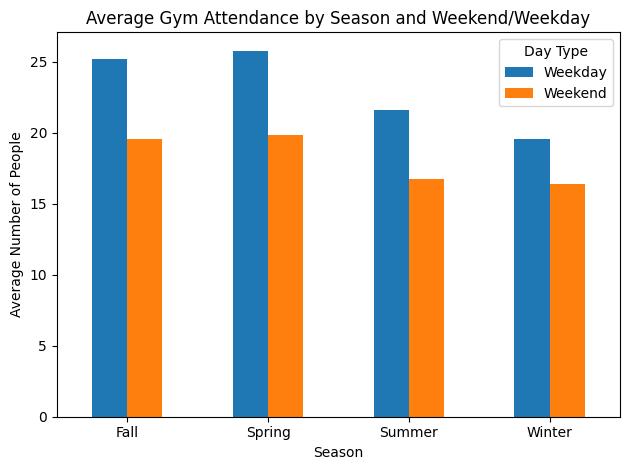

In [ ]:

# Loading the saved pivot table from earlier calculation
pivot_attendance = pd.read_csv("pivot_attendance_season_weekend.csv")
plt.figure(figsize=(10, 6))

# Plotting the bar chart for the pivot table
pivot_attendance.set_index('season')[['Weekday', 'Weekend']].plot(kind='bar', stacked=False)

# Add title and labels
plt.title('Average Gym Attendance by Season and Weekend/Weekday')
plt.xlabel('Season')
plt.ylabel('Average Number of People')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()


#### Also tried pivot table visualization in heatmap to get values and improve readability of our output

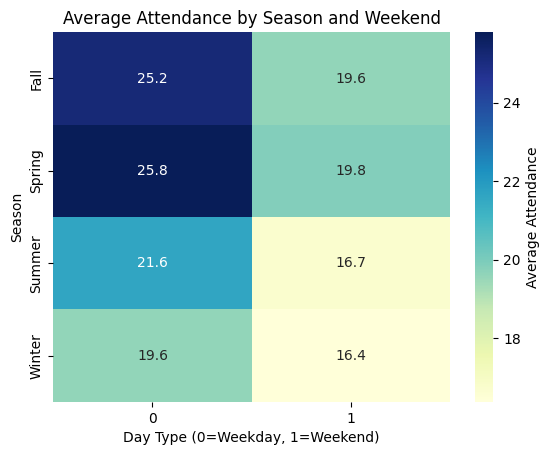

In [24]:
# Pivot table for heatmap
pivot_attendance = combined_data.pivot_table(
    index='season', 
    columns='is_weekend', 
    values='number_people', 
    aggfunc='mean'
)

# Plot
sns.heatmap(pivot_attendance, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Average Attendance'})
plt.title('Average Attendance by Season and Weekend')
plt.xlabel('Day Type (0=Weekday, 1=Weekend)')
plt.ylabel('Season')
plt.show()


#### **STEP 5: Implemented all these steps in Power BI and found the same result as python as documented all the outputs in report**